In [3]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib
import numpy as np
import os
import tqdm
%matplotlib inline

In [19]:
df = pd.read_csv('/Users/shayneufeld/Dropbox/insight/pricecamp/data/sales.csv',index_col=0)
df = df.drop_duplicates()
print('There are %.0f unique records in the database now' % df.shape[0])
print('Total revenue: %.02f' % df.amount_paid_usd.sum())

There are 213499 unique records in the database now
Total revenue: 1625843.64


In [21]:
np.sum(df['artist_name'].value_counts() > 20)

1295

In [6]:
urls_to_scrape = []
for artist in tqdm.tqdm(df.artist_name.unique()):
    temp = df[df.artist_name == artist]
    if temp.shape[0] > 20:
        urls_to_scrape.append(temp.url.values[1])

100%|██████████| 50050/50050 [13:22<00:00, 62.40it/s]


In [7]:
len(urls_to_scrape)

750

In [34]:
files = os.listdir('/Users/shayneufeld/Dropbox/insight/pricecamp/data/albums_info/')
print('Number of albums scraped: %.0f' % (len(files)-1))

Number of albums scraped: 7257


In [8]:
n=0
for url in urls_to_scrape:
    if 'track' in url:
        n+=1
        #urls_to_scrape.remove(url)

In [77]:
urls_to_scrape[0]

'//garoad.bandcamp.com/album/va-11-hall-a-second-round'

In [12]:
urls_df = pd.DataFrame(data={'urls':urls_to_scrape})
urls_df.to_csv('/Users/shayneufeld/Dropbox/insight/pricecamp/data/urls_to_scrape_0802.csv')

In [ ]:
df.amount_paid_usd

In [19]:
count = 0
rev = 0 
for i,url in tqdm.tqdm(enumerate(df.url.values)):
    if (('album' in url) or ('track' in url)):
        rev+=df.iloc[i].amount_paid_usd
        count+=1

151209it [00:22, 6708.47it/s]


In [20]:
frac = rev / df.amount_paid_usd.sum()

print('There are %.0f album + track sales totaling %.0f revenue which is %.02f of total revenue' % (count,rev,frac))

There are 142452 album + track sales totaling 990310 revenue which is 0.86 of total revenue


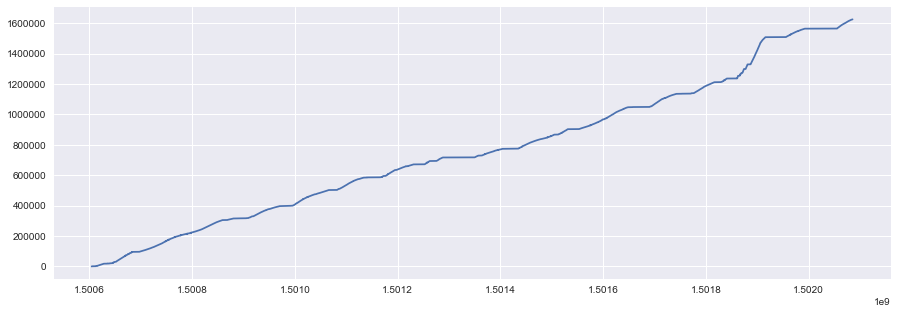

In [20]:
df.index = np.arange(df.shape[0])

plt.figure(figsize=(15,5))
plt.plot(df.utc_date.values, df.amount_paid_usd.cumsum().values)
#plt.xlim(1.5*700000e9,1.5*740000e9)

# Histogram of price per sale

(array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.,  40000.,  45000.]), <a list of 10 Text yticklabel objects>)

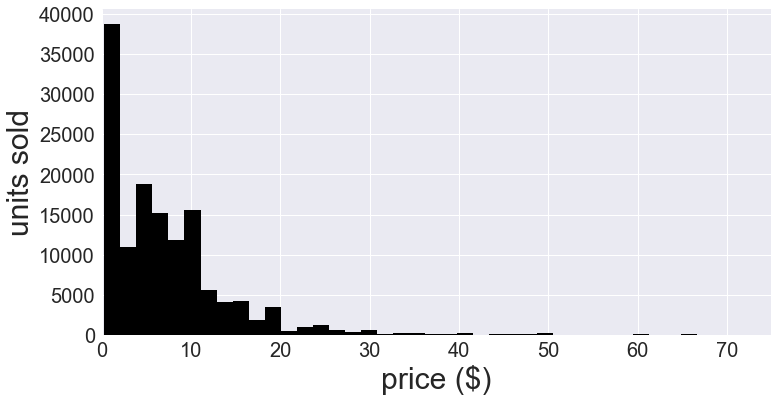

In [17]:
df = df.drop_duplicates()
plt.figure(figsize=(12,6))
paid_usd = df.amount_paid_usd.values
plt.hist(paid_usd,bins=500,color='black')
#plt.title('hist')
plt.xlim(0,75)
sns.despine()
plt.xlabel('price ($)',fontsize=30)
plt.ylabel('units sold',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Most popular albums (Top 25)

In [18]:
df.album_title.value_counts()[0:25]

DMVU - Bloccd - Limited White Vinyl w/ Truth remix (DDDX)     223
healing                                                       137
Piano Sonata                                                  115
Herdersmat part 9-15 [MORDBOX002]                              86
wave 003                                                       84
Jeff Rosenstock/SkaSucks Split 7"                              79
Travelin                                                       78
Remixes                                                        64
who told you to think??!!?!?!?!                                63
Thank You For Being A Friend                                   61
Ripe & Majestic (Instrumental Rarities & Unreleased Beats)     58
DARK CASTLE VINYL Discography                                  58
Avalon                                                         56
Tchornobog                                                     55
Losing                                                         54
Super Frea

# Most popular bands (Top 25)

In [19]:
counts = df.artist_name.value_counts()
counts[counts > 20].shape
df.artist_name.value_counts()

Various Artists                 1064
JOY                              981
Converge                         432
Ty Segall                        377
Flamingosis                      355
Aviators                         299
Darren Korb                      290
Bucketheadland                   266
Berried Alive                    265
Tchornobog                       234
HOME                             223
In Love With A Ghost             219
Amanda Palmer                    212
DMVU, TRUTH                      211
Red Letter Media                 202
MIKE                             200
CunninLynguists                  172
Japanese Breakfast               169
The Midnight                     162
BADBADNOTGOOD                    161
Stellardrone                     159
wavemob                          156
Various                          155
Eneferens                        147
マクロスMACROSS 82-99                145
Magic Sword                      145
Wintersun                        145
S

# Average sale price be category
still not sure what this means yet.

guesses:
- p: physical sale
- a: album download
- t: single download
- b: bundle sale

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

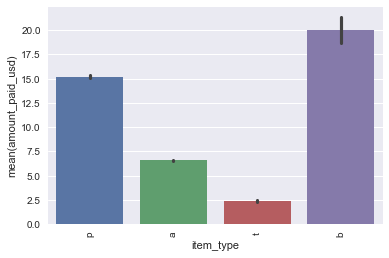

In [49]:
sns.barplot(x='item_type',y='amount_paid_usd',data=df)
plt.xticks(rotation='vertical')

New guess:
- p - physical album
- a - digital album
- t - song 
- b - bundle